# 0.0 Importando bibliotecas

In [53]:
import pandas as pd
import seaborn as sns
import re
import numpy as np
import requests as r
import matplotlib.pyplot as plt

## 0.1 Coleta de dados

In [2]:
dw = pd.read_csv('empresas.csv')

# 1.0 Descricao dos dados

In [3]:
print("numero de linhas: {}".format(dw.shape[0]))
print("numero de colunas: {}".format(dw.shape[1]))

numero de linhas: 11331
numero de colunas: 8


In [4]:
# consultando uma amostra dos dados
dw.sample(10)

,id,estado_empresa,cnae_empresa,capital_empresa,processos_judiciais_empresa,idade_empresa,socios_empresa,fornecedor_empresa
7310,7310,AM,4673700,846936,0,8,2,JJF753
8023,8023,RJ,4221902,665731,2,5,4,FOO456
1931,1931,TO,3313901,244809,0,7,3,MEL789
2261,2261,SE,4322301,224107,0,11,1,XPTO123
1344,1344,DF,4673700,133184,0,4,4,XPTO123
9357,9357,GO,4221903,797115,0,18,4,MEL789
5841,5841,TO,7112000,441748,1,17,1,XPTO123
3044,3044,AC,7112000,272965,0,7,4,MEL789
8070,8070,AP,4322302,822508,0,12,3,MEL789
3162,3162,PB,4221903,295958,1,19,1,MEL789


In [5]:
# Explorando de forma geral as variaveis numericas
# Analise descritiva
dw.describe()

,id,capital_empresa,processos_judiciais_empresa,idade_empresa,socios_empresa
count,11331.000000,11331.000000,11331.000000,11331.000000,11331.000000
mean,5665.000000,508196.307916,0.982614,10.981114,2.495896
std,3271.122284,285426.106524,1.416196,6.124697,1.118194
min,0.000000,10064.000000,0.000000,1.000000,1.000000
25%,2832.500000,262608.500000,0.000000,6.000000,1.000000
50%,5665.000000,510616.000000,0.000000,11.000000,2.000000
75%,8497.500000,756111.000000,2.000000,16.000000,3.000000
max,11330.000000,999963.000000,4.000000,21.000000,4.000000


In [6]:
# consultando valores nulos
dw.isnull().sum()

id                             0
estado_empresa                 0
cnae_empresa                   0
capital_empresa                0
processos_judiciais_empresa    0
idade_empresa                  0
socios_empresa                 0
fornecedor_empresa             0
dtype: int64

In [7]:
# consultando tipo das variaveis

dw.dtypes

id                              int64
estado_empresa                 object
cnae_empresa                   object
capital_empresa                 int64
processos_judiciais_empresa     int64
idade_empresa                   int64
socios_empresa                  int64
fornecedor_empresa             object
dtype: object

In [8]:
# consultando variaveis unicas , sem redundancia

dw['cnae_empresa'].unique() 

array(['3313901', '4221902', '3321000', '4221903', '2821601', '3329599',
       '3511500', '4322301', '3511501', '4321500', '7112000', '2821602',
       '4754703', '4673700', '4322302', '3511502', '4669901', '2731700',
       '4742300', '4322303', '4669999', '64.62-0-00', '47.42-3-00',
       '46.69-9-99', '26.10-8-00', '42.21-9-02', '47.89-0-99',
       '33.13-9-99', '43.21-5-00', '27.10-4-01', '00.00-0-00',
       '71.12-0-00', '47.51-2-01', '69.11-7-01', '35.11-5-01',
       '25.99-3-99', '70.20-4-00', '68.10-2-01', '28.29-1-99',
       '94.11-1-00', '82.19-9-99', '47.63-6-05', '35.13-1-00',
       '27.90-2-99', '33.21-0-00', '77.39-0-99', '47.59-8-99',
       '43.22-3-01', '...', '27.31-7-00', '30.32-6-00', '41.20-4-00',
       '26.51-5-00', '25.39-0-01', '47.57-1-00', '82.11-3-00',
       '85.99-6-99', '46.73-7-00', '66.22-3-00', '47.52-1-00'],
      dtype=object)

## 1.1 Transformando dados

In [9]:
# removendo todos os simbolos das variaveis
dw['cnae_empresa'] = dw['cnae_empresa'].str.replace('.','', regex = True)
dw['cnae_empresa'] = dw['cnae_empresa'].str.replace('-','', regex = True)


In [10]:
#removendo todos os espaçamentos a mais das palavras
dw['estado_empresa'] = dw['estado_empresa'].str.strip()

In [11]:
# dados incompletos, não vou deletar porque é possivel conseguir os mesmos conversando com o fornecedor.
dw[dw['estado_empresa']=='..'] 

,id,estado_empresa,cnae_empresa,capital_empresa,processos_judiciais_empresa,idade_empresa,socios_empresa,fornecedor_empresa
7025,7025,..,,922416,0,10,2,JJF753


In [12]:
dw['estado_empresa'].unique() # consultando estados unicos

array(['SP', 'AM', 'DF', 'AC', 'GO', 'AP', 'AL', 'RS', 'PB', 'PR', 'PI',
       'MG', 'ES', 'SE', 'MS', 'PE', 'SC', 'CE', 'RR', 'BA', 'MT', 'RJ',
       'PA', 'RN', 'MA', 'RO', 'TO', 'ac', 'al', 'ap', 'am', 'ba', 'ce',
       'df', 'es', 'go', 'ma', 'mt', 'ms', 'mg', 'pa', 'pb', 'pr', 'pe',
       'pi', 'rj', 'rn', 'rs', 'ro', 'sc', 'sp', 'se', 'to', '..',
       'Switzerland'], dtype=object)

In [13]:
# transformando letras minusculas em maiusculas
dw['estado_empresa'] = dw['estado_empresa'].str.upper()

In [14]:
dw['estado_empresa'].unique()

array(['SP', 'AM', 'DF', 'AC', 'GO', 'AP', 'AL', 'RS', 'PB', 'PR', 'PI',
       'MG', 'ES', 'SE', 'MS', 'PE', 'SC', 'CE', 'RR', 'BA', 'MT', 'RJ',
       'PA', 'RN', 'MA', 'RO', 'TO', '..', 'SWITZERLAND'], dtype=object)

In [15]:
# Conversar com as partes para descobrir o estado '..' e cnae '..'

dw[dw['estado_empresa']=='..'] 

,id,estado_empresa,cnae_empresa,capital_empresa,processos_judiciais_empresa,idade_empresa,socios_empresa,fornecedor_empresa
7025,7025,..,,922416,0,10,2,JJF753


In [16]:
# Conversar com as partes para entender se o estado_empresa 'Switzerland' está incorreto.
dw[dw['estado_empresa']=='Switzerland'] 

,id,estado_empresa,cnae_empresa,capital_empresa,processos_judiciais_empresa,idade_empresa,socios_empresa,fornecedor_empresa


In [17]:
# transformando em string
dw['id'] = dw['id'].astype(str)

## 1.2 Filtrando variaveis

In [18]:
df = dw.copy()

In [19]:
# removendo as variaveis que não irei utilizar para analise.
df = df[(df['estado_empresa']!='Switzerland') & (df['estado_empresa']!='..')]

In [20]:
# Preferencia para empresas que não possuem processos.
# segundo o IBGE as empresas quebram antes de completar 2 anos. Irei usar esse filtro.

df = df[(df['processos_judiciais_empresa'] == 0) & (df['idade_empresa'] > 2)]

In [21]:
# consultando colunas
df.columns

Index(['id', 'estado_empresa', 'cnae_empresa', 'capital_empresa',
       'processos_judiciais_empresa', 'idade_empresa', 'socios_empresa',
       'fornecedor_empresa'],
      dtype='object')

In [22]:
# Um dos objetivos da CNAE é melhorar a fiscalização do governo, 
# por meio da padronização dos códigos de atividades econômicas exercidas no país

df['cnae_empresa'].unique() 
# 3511501 - a manutenção de redes de eletricidade de origem solar
# 4322301 - a instalação, alteração, manutenção e reparo de sistemas de aquecimento(coletor solar)
# 4321500 - Instalação e manutenção elétrica de origem solar


array(['3321000', '4221903', '2821601', '3511500', '2821602', '4322301',
       '4754703', '3329599', '4673700', '4322302', '4221902', '4669901',
       '4321500', '3511502', '3313901', '3511501', '4669999', '4742300',
       '2731700', '4322303', '7112000', '2610800', '4789099', '3313999',
       '2710401', '0000000', '4751201', '6911701', '2599399', '8219999',
       '3513100', '6462000', '7739099', '4759899', '2651500', '2539001',
       '', '8211300', '6622300', '4757100'], dtype=object)

## 2.0 API - Dados externos

In [25]:
# Usando a API do IBGE para adicionar informações de atividade de cada CNAE
url = "https://servicodados.ibge.gov.br/api/v2/cnae/subclasses"
response = r.request('GET',url)
ibge_raw = pd.DataFrame(response.json())
ibge_raw.head(5)

,id,descricao,classe,atividades,observacoes
0,4929902,"TRANSPORTE RODOVIÁRIO COLETIVO DE PASSAGEIROS,...","{'id': '49299', 'descricao': 'TRANSPORTE RODOV...",[AUTOMÓVEIS COLETIVOS COM MOTORISTA (CONDUTOR)...,[Esta subclasse compreende - o transporte rodo...
1,4929902,"TRANSPORTE RODOVIÁRIO COLETIVO DE PASSAGEIROS,...","{'id': '49299', 'descricao': 'TRANSPORTE RODOV...",[TRANSPORTE RODOVIÁRIO COLETIVO DE PASSAGEIROS...,[Esta subclasse compreende - o transporte rodo...
2,4929902,"TRANSPORTE RODOVIÁRIO COLETIVO DE PASSAGEIROS,...","{'id': '49299', 'descricao': 'TRANSPORTE RODOV...",[VEÍCULOS RODOVIÁRIOS COLETIVOS COM MOTORISTA ...,[Esta subclasse compreende - o transporte rodo...
3,4929902,"TRANSPORTE RODOVIÁRIO COLETIVO DE PASSAGEIROS,...","{'id': '49299', 'descricao': 'TRANSPORTE RODOV...","[ÔNIBUS COM MOTORISTA (CONDUTOR), INTERMUNICIP...",[Esta subclasse compreende - o transporte rodo...
4,1610204,SERRARIAS SEM DESDOBRAMENTO DE MADEIRA EM BRUT...,"{'id': '16102', 'descricao': 'DESDOBRAMENTO DE...",[ASSOALHOS DE MADEIRA; PRODUÇÃO DE],[Esta subclasse compreende - a produção de mad...


In [26]:
# Renomeando a coluna. O Id é o próprio CNAE.
ibge_raw=ibge_raw.rename(columns={'id':'cnae_empresa'})

### 2.1 Explorando e entendendo dados externos

In [27]:
# Fazendo a abertura do dicionario de dentro da coluna 'Classe'.
ibge = pd.DataFrame(ibge_raw['classe'])

ibge1=ibge['classe'].apply(pd.Series)

In [28]:
# conteudo do dicionario sendo transformado em dataframe, nesse caso, a Classe do CNAE contem 5 numeros.
# Fazendo a abertura do dicionario de dentro da coluna Classe, são varios dicionarios dentro dessa coluna.

ibge1= ibge1.rename(columns={'id':'classe'})

ibge1['cnae_empresa'] = ibge_raw['cnae_empresa']

ibge1=ibge1.reset_index(names='id')

In [29]:
ibge1.head()

,id,classe,descricao,grupo,observacoes,cnae_empresa
0,0,49299,"TRANSPORTE RODOVIÁRIO COLETIVO DE PASSAGEIROS,...","{'id': '492', 'descricao': 'TRANSPORTE RODOVIÁ...",[Esta classe compreende - o transporte rodoviá...,4929902
1,1,49299,"TRANSPORTE RODOVIÁRIO COLETIVO DE PASSAGEIROS,...","{'id': '492', 'descricao': 'TRANSPORTE RODOVIÁ...",[Esta classe compreende - o transporte rodoviá...,4929902
2,2,49299,"TRANSPORTE RODOVIÁRIO COLETIVO DE PASSAGEIROS,...","{'id': '492', 'descricao': 'TRANSPORTE RODOVIÁ...",[Esta classe compreende - o transporte rodoviá...,4929902
3,3,49299,"TRANSPORTE RODOVIÁRIO COLETIVO DE PASSAGEIROS,...","{'id': '492', 'descricao': 'TRANSPORTE RODOVIÁ...",[Esta classe compreende - o transporte rodoviá...,4929902
4,4,16102,DESDOBRAMENTO DE MADEIRA,"{'id': '161', 'descricao': 'DESDOBRAMENTO DE M...",[Esta classe compreende - a fabricação de made...,1610204


### 2.2 Limpando e Transformando para encontrar a descrição dos CNAE

In [30]:
# removendo o dicionario 'grupo' de dentro da coluna classe e tranformando em dataframe.
ibge2 =ibge1['grupo'].apply(pd.Series)
ibge2= ibge2.rename(columns={'id':'grupo'})
ibge2['cnae_empresa'] = ibge_raw['cnae_empresa']
ibge2=ibge2.reset_index(names='id')
ibge2.head(2)

,id,grupo,descricao,divisao,cnae_empresa
0,0,492,TRANSPORTE RODOVIÁRIO DE PASSAGEIROS,"{'id': '49', 'descricao': 'TRANSPORTE TERRESTR...",4929902
1,1,492,TRANSPORTE RODOVIÁRIO DE PASSAGEIROS,"{'id': '49', 'descricao': 'TRANSPORTE TERRESTR...",4929902


In [31]:
# removendo o dicionario 'divisao' de dentro da coluna classe e tranformando em dataframe.
ibge3 =ibge2['divisao'].apply(pd.Series)
ibge3= ibge3.rename(columns={'id':'divisao'})
ibge3['id'] = ibge_raw['cnae_empresa']
ibge3=ibge3.rename(columns={'id':'cnae_empresa'})
ibge3=ibge3.reset_index(names='id')
ibge3.head(2)

,id,divisao,descricao,secao,cnae_empresa
0,0,49,TRANSPORTE TERRESTRE,"{'id': 'H', 'descricao': 'TRANSPORTE, ARMAZENA...",4929902
1,1,49,TRANSPORTE TERRESTRE,"{'id': 'H', 'descricao': 'TRANSPORTE, ARMAZENA...",4929902


In [32]:
# removendo o dicionario secao de dentro da coluna classe e tranformando em dataframe.

ibge4 =ibge3['secao'].apply(pd.Series)
ibge4= ibge4.rename(columns={'id':'secao'})
ibge4=ibge4.reset_index(names='id')
ibge4

,id,secao,descricao
0,0,H,"TRANSPORTE, ARMAZENAGEM E CORREIO"
1,1,H,"TRANSPORTE, ARMAZENAGEM E CORREIO"
2,2,H,"TRANSPORTE, ARMAZENAGEM E CORREIO"
3,3,H,"TRANSPORTE, ARMAZENAGEM E CORREIO"
4,4,C,INDÚSTRIAS DE TRANSFORMAÇÃO
...,...,...,...
16835,16835,Q,SAÚDE HUMANA E SERVIÇOS SOCIAIS
16836,16836,Q,SAÚDE HUMANA E SERVIÇOS SOCIAIS
16837,16837,Q,SAÚDE HUMANA E SERVIÇOS SOCIAIS
16838,16838,G,COMÉRCIO; REPARAÇÃO DE VEÍCULOS AUTOMOTORES E ...


In [33]:
# fazendo a união dos dataframes 
ibge_merge = df.merge(ibge_raw, on=['cnae_empresa'], how='left',indicator=True)

#filtrando apenas os dados q são de ambos os datasets
filtro = ibge_merge['_merge'] == 'both'
ibge_merge = ibge_merge[filtro]


In [34]:
#criando uma cópia dos dados
ibge = ibge_merge.copy()

In [35]:
# concatenando as partes do CNAE que eram varios dicionarios.
ibge = pd.concat([ibge_merge,ibge4,ibge3,ibge2,ibge1])

# removendo colunas que não irei utilizar
cols_drop = ['_merge','secao','divisao','grupo','classe','observacoes','processos_judiciais_empresa','id','atividades']
ibge = ibge.drop(cols_drop,axis=1)


- 3511501 : a manutenção de redes de eletricidade de origem solar
- 4322301 : a instalação, alteração, manutenção e reparo de sistemas de aquecimento(coletor solar)
- 4321500 : Instalação e manutenção elétrica de origem solar

In [36]:
# optei filtrar por essas duas cnae porque o time de negocio pediu parceiros que fazem instalação e não apenas manutenção.
ibge= ibge[(ibge['cnae_empresa'] == '4322301') | (ibge['cnae_empresa'] == '4321500')]

In [37]:
# consultando valores nulos
ibge.isnull().sum()

ibge.dropna(axis=0,inplace=True)

In [50]:
# removendo os colchetes e numeros do dataframe com regex
#text = ibge['atividades']
#ibge['atividades'] = re.sub(r"[\([{})\]]", "",str(text)) # remove esse tipo de simbolos
#ibge['atividades'] = re.sub(r'\b\d+(?:\.\d+)?\s+', '', str(text)) #remove numeros


In [40]:
ibge.sample(10)


,estado_empresa,cnae_empresa,capital_empresa,idade_empresa,socios_empresa,fornecedor_empresa,descricao
54753,SE,4321500,139105.0,12.0,1.0,FOO456,INSTALAÇÃO E MANUTENÇÃO ELÉTRICA
44569,MS,4321500,66615.0,14.0,3.0,FOO456,INSTALAÇÃO E MANUTENÇÃO ELÉTRICA
66801,RN,4322301,646547.0,16.0,4.0,JJF753,"INSTALAÇÕES HIDRÁULICAS, SANITÁRIAS E DE GÁS"
21304,AL,4321500,948701.0,16.0,3.0,CABL951,INSTALAÇÃO E MANUTENÇÃO ELÉTRICA
85438,AP,4321500,146618.0,12.0,1.0,XPTO123,INSTALAÇÃO E MANUTENÇÃO ELÉTRICA
24330,TO,4321500,427807.0,12.0,1.0,JJF753,INSTALAÇÃO E MANUTENÇÃO ELÉTRICA
49453,PR,4321500,341220.0,15.0,1.0,JJF753,INSTALAÇÃO E MANUTENÇÃO ELÉTRICA
53501,RJ,4321500,34201.0,19.0,3.0,XPTO123,INSTALAÇÃO E MANUTENÇÃO ELÉTRICA
1322,GO,4321500,669886.0,11.0,1.0,XPTO123,INSTALAÇÃO E MANUTENÇÃO ELÉTRICA
7454,ES,4321500,38588.0,20.0,3.0,XPTO123,INSTALAÇÃO E MANUTENÇÃO ELÉTRICA


In [41]:
# definindo a escolha da empresa a partir da media de valor de capital.
ibge['capital_empresa'].mean()

filtro = ibge['capital_empresa'] >= 508529
ibge= ibge[filtro]


In [42]:
# removendo dados duplicados
ibge = ibge.drop_duplicates()


In [43]:

# salvando dataset limpo 
ibge.to_csv('dataset_clean_empresas.csv', index=False)


## Novas Features

In [44]:
ibge['regiao'] =  ibge['estado_empresa'].apply(lambda x: 'nordeste' if x == 'MA' 
                                                    else 'nordeste' if x == 'PI' 
                                                    else 'nordeste' if x == 'CE'
                                                    else 'nordeste' if x == 'RN' 
                                                    else 'nordeste' if x == 'PE'
                                                    else 'nordeste' if x == 'PB'
                                                    else 'nordeste' if x == 'SE'
                                                    else 'nordeste' if x == 'AL'
                                                    else 'nordeste' if x == 'BA'
                                                    else 'centro_oeste' if x == 'MT' 
                                                    else 'centro_oeste' if x == 'MS' 
                                                    else 'centro_oeste' if x == 'GO'
                                                    else 'sudeste' if x == 'SP' 
                                                    else 'sudeste' if x == 'RJ' 
                                                    else 'sudeste' if x == 'ES'
                                                    else 'sudeste' if x == 'MG'
                                                    else 'sul' if x == 'PR' 
                                                    else 'sul' if x == 'RS' 
                                                    else 'sul' if x == 'SC'
                                                    else 'norte' if x =='AM'
                                                    else 'norte' if x =='RR'
                                                    else 'norte' if x =='AP'
                                                    else 'norte' if x =='PA'
                                                    else 'norte' if x =='TO'
                                                    else 'norte' if x =='RO'
                                                    else 'norte' )


In [65]:
ibge.dtypes

estado_empresa         object
cnae_empresa           object
capital_empresa       float64
idade_empresa         float64
socios_empresa        float64
fornecedor_empresa     object
descricao              object
regiao                 object
dtype: object

In [66]:
ibge['idade_empresa'] = ibge['idade_empresa'].astype('int64')
ibge['socios_empresa'] = ibge['socios_empresa'].astype('int64')

# 3.0 EDA (  Análise Exploratória)

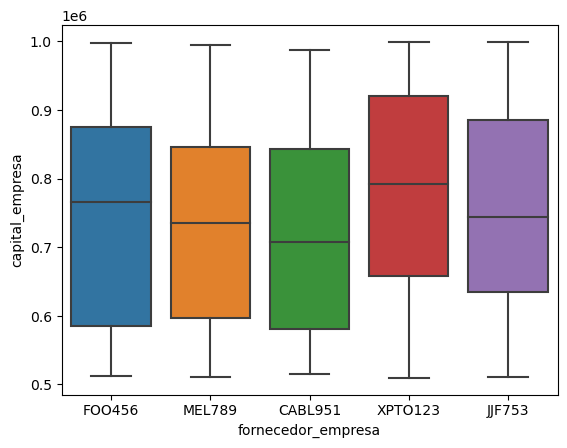

In [68]:
# verificando Outliers
sns.boxplot(data=ibge,x='fornecedor_empresa',y='capital_empresa');

## H1. Fornecedores com franquias no estado de São Paulo possui maior capital.

FALSO. No estado de Amapá é aonde o capital é maior

,estado_empresa,capital_empresa
3,AP,16012515.0
19,RN,15733820.0
23,SC,15127409.0
5,CE,14536375.0
4,BA,14328950.0


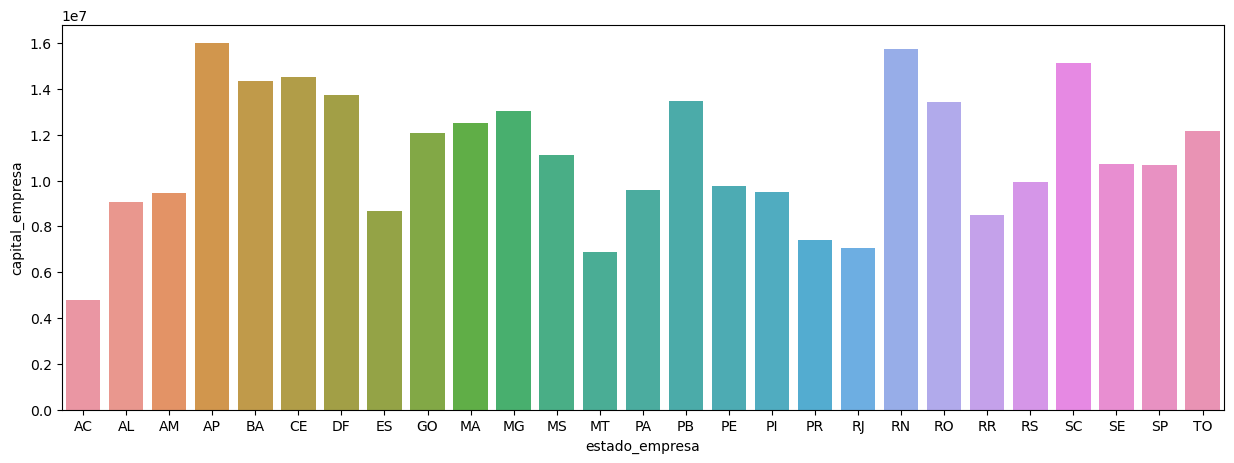

In [69]:
plt.figure(figsize=(15,5))
aux = ibge[['estado_empresa', 'capital_empresa']].groupby('estado_empresa').sum().reset_index()
sns.barplot(x='estado_empresa',y='capital_empresa',data=aux);
aux.sort_values('capital_empresa', ascending=False).head(5)

Distribuição de capital por fornecedor

## H2. O fornecedor FOO456 possui maior numero de franquias.


VERDADEIRO. O Fornecedor MEL789 também possui a mesma quantidade de franquia.

In [71]:
ibge.sort_values('fornecedor_empresa')
fornecedor_estado= ibge['estado_empresa'].drop_duplicates()
fornecedor_estado = ibge[['fornecedor_empresa','estado_empresa']]
a=fornecedor_estado[['fornecedor_empresa','estado_empresa']].groupby('fornecedor_empresa').value_counts().reset_index()
a=a.rename(columns={0:'count'})
b=a[['fornecedor_empresa','count']].groupby('fornecedor_empresa').sum().reset_index()
b.sort_values('count',ascending=False)

,fornecedor_empresa,count
1,FOO456,86
3,MEL789,84
4,XPTO123,82
2,JJF753,81
0,CABL951,68


## H3. O fornecedor MEL789 tem maior capital

FALSO. O fornecedor XPTO123 possui maior capital

,fornecedor_empresa,capital_empresa
4,XPTO123,63784657.0
1,FOO456,63634078.0
3,MEL789,61698857.0
2,JJF753,60975753.0
0,CABL951,49327031.0


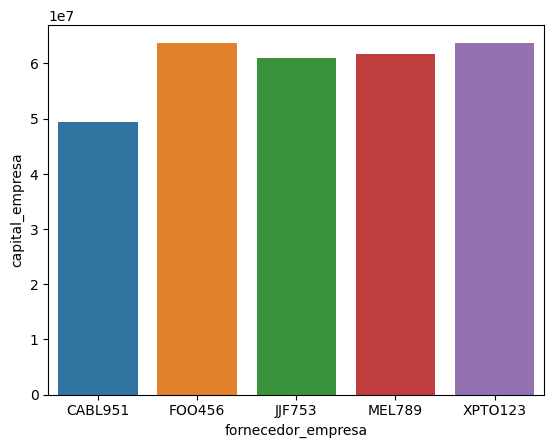

In [72]:
a=ibge[['fornecedor_empresa','capital_empresa']].groupby('fornecedor_empresa').sum().reset_index()
sns.barplot(x='fornecedor_empresa',y='capital_empresa',data=a);

a.sort_values('capital_empresa',ascending=False)



## H4. Empresas com maior tempo de mercado possui maior capital

FALSO. O valor de Capital é variavel em relação ao tempo.

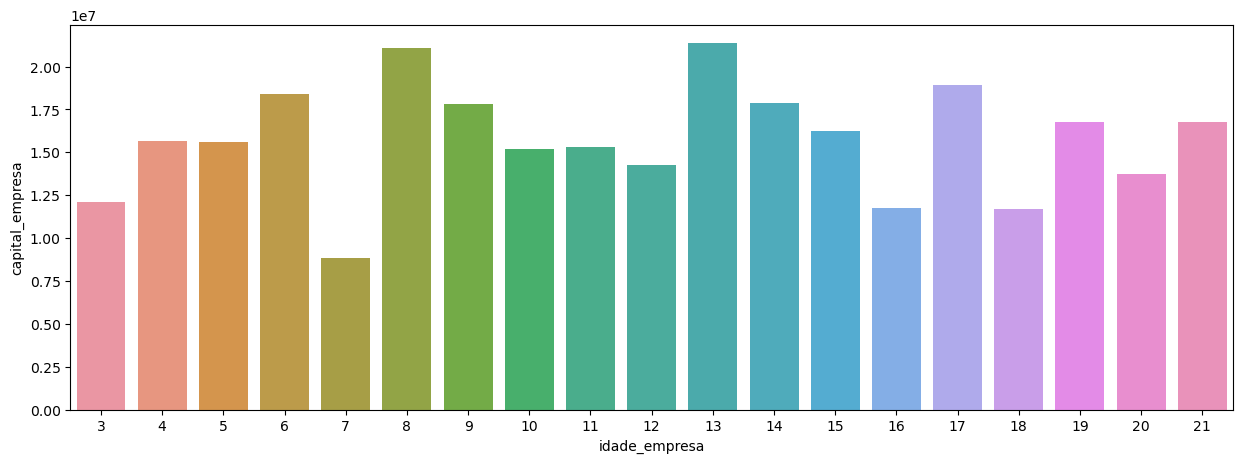

In [73]:
plt.figure(figsize=(15,5))
aux = ibge[['idade_empresa', 'capital_empresa']].groupby('idade_empresa').sum().reset_index()
sns.barplot(x='idade_empresa',y='capital_empresa',data=aux);


## H5. Qual o fornecedor com maior tempo de mercado e maior capital

O fornecedor com maior tempo de mercado é MEL789 com capital de 61.698.857.00.
Porém, o fornecedor XPTO123 tem o maior capital 63.784.657.00 e está na segunda posição em tempo de mercado.

,idade_empresa,fornecedor_empresa,capital_empresa
4,1006,XPTO123,63784657.0
1,1003,FOO456,63634078.0
3,1032,MEL789,61698857.0
2,991,JJF753,60975753.0
0,816,CABL951,49327031.0


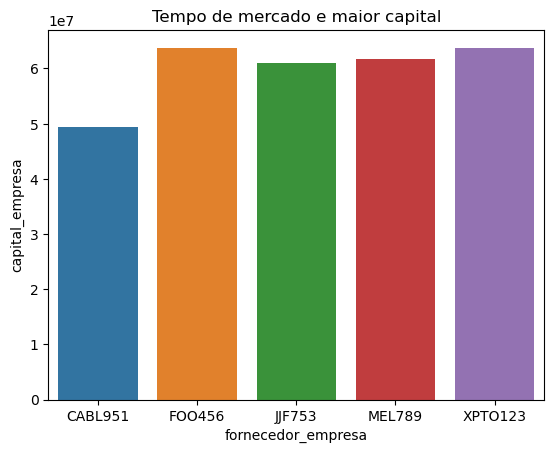

In [74]:
aux=ibge[['idade_empresa', 'fornecedor_empresa','capital_empresa']].groupby('fornecedor_empresa').sum().reset_index()
plt.title('Tempo de mercado e maior capital')
sns.barplot(x='fornecedor_empresa',y='capital_empresa',data=aux);
aux[['idade_empresa', 'fornecedor_empresa','capital_empresa']].sort_values('capital_empresa',ascending=False)
#plt.savefig('plot_tempo_capital.png', dpi = 100)



## H6. Empresas com maior numero de socios possui maior capital

FALSO. Franquias com apenas 1 ou 2 sócios possuem maior capital

,socios_empresa,capital_empresa
0,1,78168452.0
1,2,80493673.0
2,3,68125519.0
3,4,72632732.0


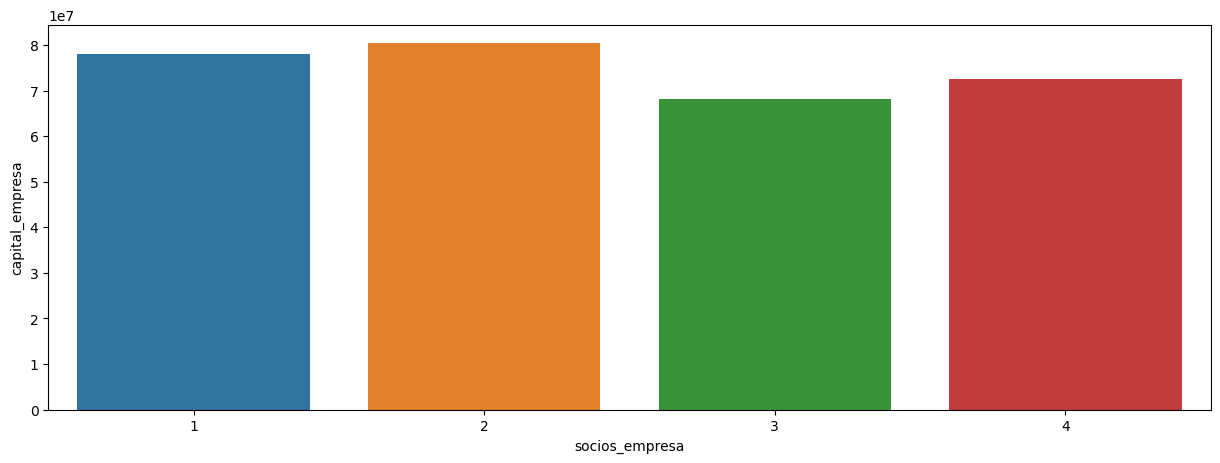

In [75]:
plt.figure(figsize=(15,5))
aux = ibge[['socios_empresa', 'capital_empresa']].groupby('socios_empresa').sum().reset_index()
sns.barplot(x='socios_empresa',y='capital_empresa',data=aux);
aux

## H7. Empresas com maior numero de franquias possui maior capital

FALSO.Nos dados disponiveis, a empresa com maior numero de franquias não possui o maior capital,
porém a tendencia é de que quanto maior o numero de franquia maior o capital.

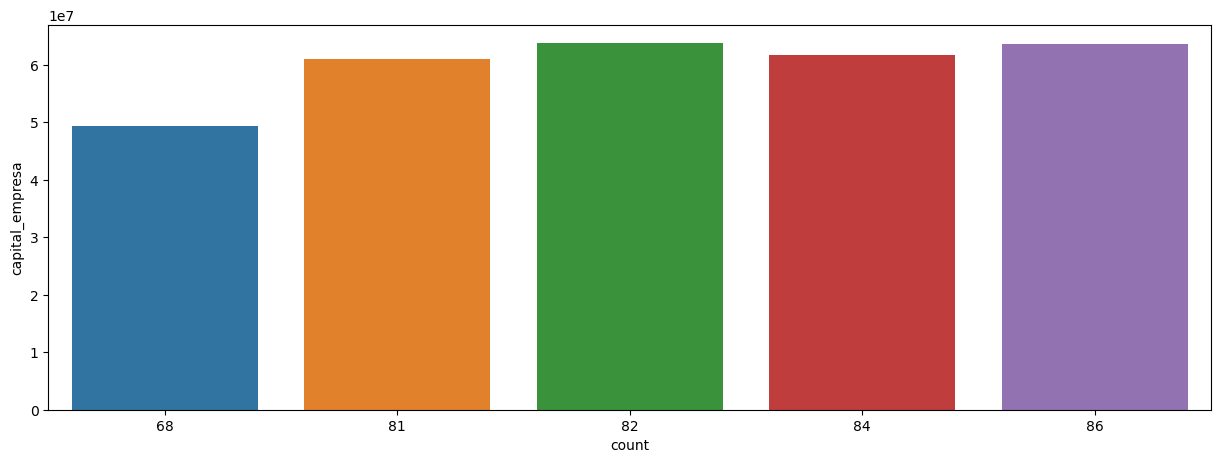

In [78]:
a=ibge[['fornecedor_empresa','estado_empresa','capital_empresa']].groupby(['fornecedor_empresa']).value_counts().reset_index()
a=a.rename(columns={0:'count'})
b=a[['fornecedor_empresa','count','capital_empresa']].groupby('fornecedor_empresa').sum().reset_index()

plt.figure(figsize=(15,5))
sns.barplot(x='count',y='capital_empresa',data=b);
b.sort_values('capital_empresa',ascending=False)
plt.savefig('plot_franquia_capital.png', dpi = 100)


## H8. A região nordeste possui mais fornecedores

VERDADEIRO. Possui 146 ao total.

C:\Users\wesle\AppData\Local\Temp\ipykernel_2732\2354232060.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  b=a[['fornecedor_empresa','count','regiao']].groupby('regiao').sum().reset_index()


,regiao,count
1,nordeste,146
2,norte,118
3,sudeste,52
4,sul,44
0,centro_oeste,41


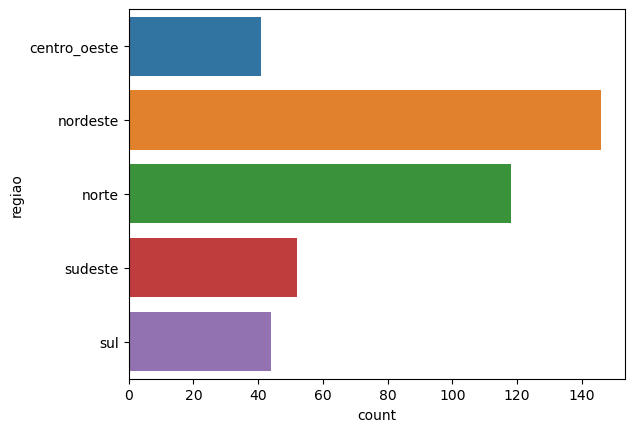

In [79]:
a=ibge[['fornecedor_empresa','regiao']].groupby(['fornecedor_empresa']).value_counts().reset_index()
a=a.rename(columns={0:'count'})
b=a[['fornecedor_empresa','count','regiao']].groupby('regiao').sum().reset_index()

sns.barplot(x='count',y='regiao',data=b);
b.sort_values('count',ascending=False)


## H9. A região norte é onde possui maior capital

FALSO. O Nordeste é a regiao com maior capital

,regiao,capital_empresa
1,nordeste,109655387.0
2,norte,87682990.0
3,sudeste,39480936.0
4,sul,32489987.0
0,centro_oeste,30111076.0


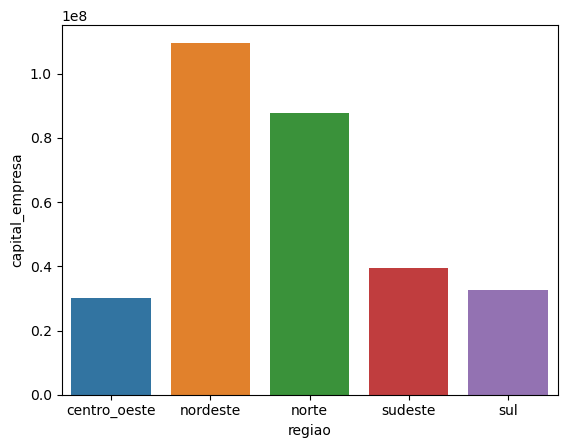

In [80]:
b=ibge[['capital_empresa','regiao']].groupby('regiao').sum().reset_index()

sns.barplot(x='regiao',y='capital_empresa',data=b);
b.sort_values('capital_empresa',ascending=False)

## H10. A empresa JJF753 tem o maior capital no Sul

VERDADEIRO. A empresa tem maior capital no sul sendo 6.738.941,00

,fornecedor_empresa,regiao,capital_empresa
16,MEL789,nordeste,27023852.0
11,JJF753,nordeste,26579407.0
21,XPTO123,nordeste,22179949.0
7,FOO456,norte,19319628.0
6,FOO456,nordeste,19092690.0
17,MEL789,norte,18562622.0
22,XPTO123,norte,18475495.0
12,JJF753,norte,15945947.0
2,CABL951,norte,15379298.0
1,CABL951,nordeste,14779489.0


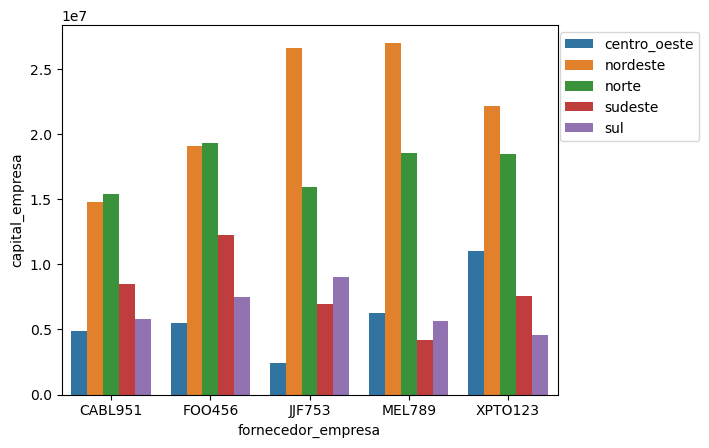

In [81]:
b=ibge[['capital_empresa','regiao','fornecedor_empresa']].groupby(['fornecedor_empresa','regiao']).sum().reset_index()
sns.barplot(data=b, x="fornecedor_empresa", y="capital_empresa", hue="regiao")
plt.legend(bbox_to_anchor=(1.30,1),loc='upper right')

b.sort_values('capital_empresa',ascending=False)
#plt.savefig('plot_regiao_capital.png', dpi = 100)
